# PROJET QUADRATURE NUMERIQUE (EDO)

IPSA 2022

### Objectif:

Représentation graphique de la trajectoire dans l'espace de phase.

In [261]:
import numpy as np
from matplotlib import pyplot as plt

# 1. Méthodes numériques de résolution d’équations différentielles

### 1.1 et 1.3 Dans la classe Resolve
Création des méthodes Euler explicite et des methodes de Runge-Kutta d'ordre 2 et 4

Création de la classe Resolve pour résoudre l'équation différentielle.
On utilise la méthode Kutta.

In [311]:
class Resolve:


    def __init__(self, L, a, b, N, k, fct):
        '''

        :param L: Paramètre fix à 1
        :param a: intervalle min
        :param b: intervalle max
        :param N: Nombre d'intervalles
        '''

        if (fct == "pendule") or (fct == "pendule-linear2"):
            self.y0 = np.array([np.pi/2, 0])
        elif fct == "1.2.3":
            self.y0 = np.array([1, 0])
        elif fct == "1.2.2" or fct == "1.2.1":
            self.y0 = np.array([0, 0])
        else:
            self.y0 = np.array([0.00001, 0])


        self.a = a
        self.b = b
        self.N = N
        self.fct = fct # 1 = y' = -y + t # 2 fonction pendule

        self.L = L
        self.k = k
        self.h = (self.b - self.a) / self.N # Le Pas
        self.t = np.linspace(a, b, self.N+1)

    def f(self, y, ti=None):


        if self.fct == "1.2.1":
            a = y[1]
            b = -y[0] + ti
        elif self.fct == "1.2.2":
            a = y[1]
            b = ti - y[0]
        elif self.fct == "1.2.3":
            a = y[1]
            b = y[0] + np.power(y[0], 2)
        elif (self.fct == "pendule-linear") or (self.fct == "pendule-linear2"):
            a = y[1]
            b = - (9.81/self.L) * y[0] - (self.k/self.L)*a
        else:
            # pendule
            a = y[1]
            b = - (9.81/self.L) * np.sin(y[0]) - (self.k/self.L)*a


        return np.array([a, b])

    def euler_explicite(self):

        y_n = self.y0
        Y = [self.y0]
        for ti in self.t[0:-1]:
            e = self.f(y_n, ti)
            y_n = y_n + self.h*e
            Y.append(y_n)

        return self.t, np.array(Y)


    def kutta2(self):
        '''
        Methode de Runge-Kutta à 2
        :return: t -> les abcisses correspondants à chaque noeud de la fonction.
                 Y -> Les solutions de l'equation
        '''

        y_n = self.y0
        Y = [self.y0]
        for ti in self.t[0:-1]:

            y_bar = y_n + (self.h/2)*self.f(y_n, ti)

            y_n = y_n + self.h*self.f(y_bar, ti + (self.h/2)) # Calcul de Yn+1
            Y.append(y_n)

        return self.t, np.array(Y)

    def kutta4(self):
        '''
        Methode de Runge-Kutta à 4
        :return: t -> les abcisses correspondants à chaque noeud de la fonction.
                 Y -> Les solutions de l'equation
        '''

        y_n = self.y0
        Y = [self.y0]
        for ti in self.t[0:-1]:

            k1 = self.f(y_n, ti)
            k2 = self.f(y_n + (self.h/2)*k1, ti)
            k3 = self.f(y_n + (self.h/2)*k2, ti)
            k4 = self.f(y_n + self.h*k3, ti)
            y_n = y_n + (self.h/6)*(k1 + 2*k2 + 2*k3 + k4) # Calcul de Yn+1
            Y.append(y_n)

        return self.t, np.array(Y)

### 1.2 Problème de Cauchy

1) $\textit{y' = -y + t avec y(0)=0}$  sur l'intervalle [0, 2]

Text(0.5, 1.0, "Solution réelle de $y' = -y + t$")

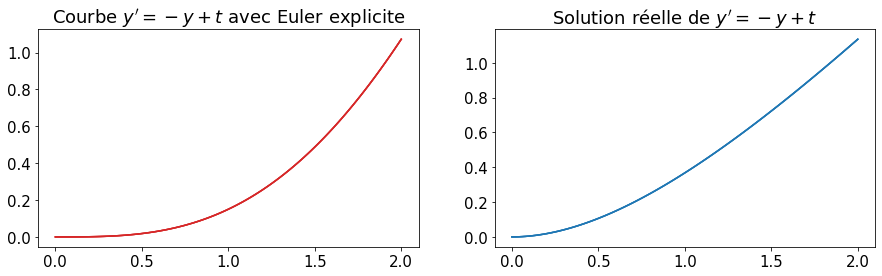

In [263]:
N = 100
a = 0
b = 2
step = 0.4 # h=0.4

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)

for k in np.arange(0.1, 1, step):
    res = Resolve(None, a, b, N, None, "1.2.1")
    t1, Y1 = res.euler_explicite()
    axs[0].plot(t1, Y1[:, 0], 'tab:red')


for k in np.arange(0.1, 1, step):
    Y2 = []
    for t in res.t:
        Y2.append(t - 1 + np.exp(-t))

    axs[1].plot(res.t, Y2, 'tab:blue')

axs[0].set_title("Courbe $y' = -y + t$ avec Euler explicite")
axs[1].set_title("Solution réelle de $y' = -y + t$")

2) $\textit{y'' = -y' + t avec y(0)=0 et y'(0) = 0}$  sur l'intervalle [0, 5]

Text(0.5, 1.0, "Solution réelle de $y'' + y = t$")

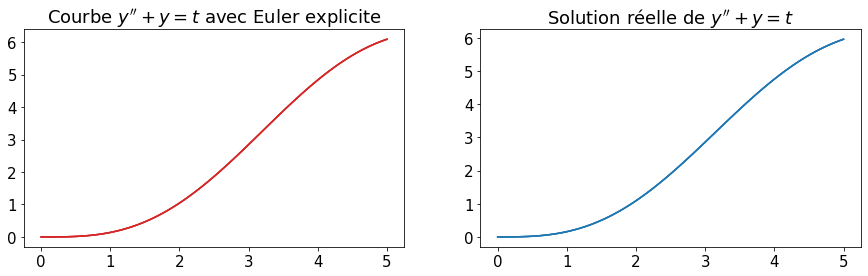

In [264]:
N = 100
a = 0
b = 5
step = 0.4 # h=0.4

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)

for k in np.arange(0.1, 1, step):
    res = Resolve(None, a, b, N, None, "1.2.2")
    t1, Y1 = res.euler_explicite()
    axs[0].plot(t1, Y1[:, 0], 'tab:red')


for k in np.arange(0.1, 1, step):
    Y2 = []
    for t in res.t:
        Y2.append(t - np.sin(t))
    axs[1].plot(res.t, Y2, 'tab:blue')

axs[0].set_title("Courbe $y'' + y = t$ avec Euler explicite")
axs[1].set_title("Solution réelle de $y'' + y = t$")

3) $\textit{y' = y + y² avec y(0)=1}$  sur l'intervalle [0, 1/2]

Text(0.5, 1.0, "Solution réelle de $y' = y + y²$")

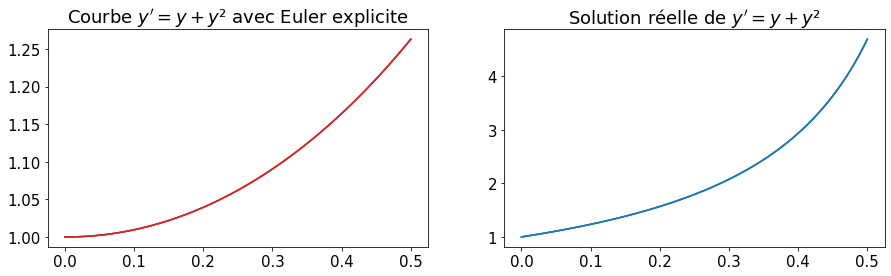

In [265]:
N = 100
a = 0
b = 0.5
step = 0.4 # h=0.4

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)

for k in np.arange(0.1, 1, step):
    res = Resolve(None, a, b, N, None, "1.2.3")
    t1, Y1 = res.euler_explicite()
    axs[0].plot(t1, Y1[:, 0], 'tab:red')


for k in np.arange(0.1, 1, step):
    Y2 = []
    for t in res.t:
        Y2.append(np.exp(t)/(2 - np.exp(t)))
    axs[1].plot(res.t, Y2, 'tab:blue')

axs[0].set_title("Courbe $y' = y + y²$ avec Euler explicite")
axs[1].set_title("Solution réelle de $y' = y + y²$")

### 1.3 Methodes de Runge-Kutta

On teste la méthode de Runge-Kutta 4 avec la deuxième équation par exemple.

Text(0.5, 1.0, "Solution réelle de $y'' + y = t$")

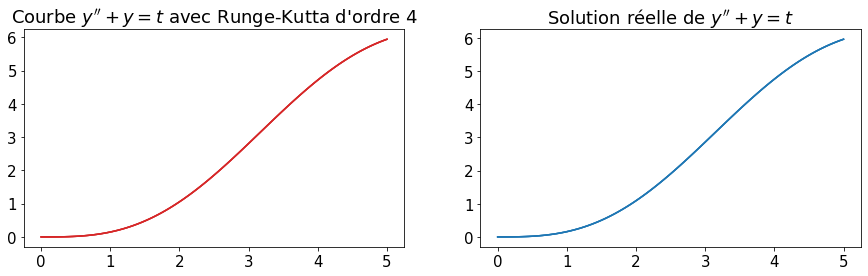

In [266]:
N = 100
a = 0
b = 5
step = 0.4 # h=0.4

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)

for k in np.arange(0.1, 1, step):
    res = Resolve(None, a, b, N, k, "1.2.2")
    t1, Y1 = res.kutta4()
    axs[0].plot(t1, Y1[:, 0], 'tab:red')


for k in np.arange(0.1, 1, step):
    Y2 = []
    for t in res.t:
        # Y2.append(t - 1 + np.exp(-t)) equation 1
        Y2.append(t - np.sin(t))
    axs[1].plot(res.t, Y2, 'tab:blue')

axs[0].set_title("Courbe $y'' + y = t$ avec Runge-Kutta d'ordre 4")
axs[1].set_title("Solution réelle de $y'' + y = t$")

On teste la méthode de Runge-Kutta 2 avec la première équation par exemple.

Text(0.5, 1.0, "Solution réelle de $y' = - y + t$")

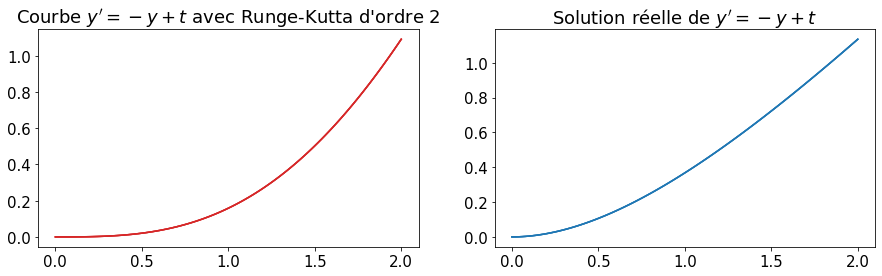

In [267]:
N = 100
a = 0
b = 2
step = 0.4 # h=0.4

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)

for k in np.arange(0.1, 1, step):
    res = Resolve(None, a, b, N, k, "1.2.1")
    t1, Y1 = res.kutta2()
    axs[0].plot(t1, Y1[:, 0], 'tab:red')




for k in np.arange(0.1, 1, step):
    Y2 = []
    for t in res.t:
        Y2.append(t - 1 + np.exp(-t))

    axs[1].plot(res.t, Y2, 'tab:blue')

axs[0].set_title("Courbe $y' = - y + t$ avec Runge-Kutta d'ordre 2")
axs[1].set_title("Solution réelle de $y' = - y + t$")

Observation: Que ce soit avec Runge-Kutta d'ordre 2 ou 4 on obtient des résultats similaire à Euler explicite. Les courbes obtenues sont presque identique à celles de la solution réelle.

On plot $\theta'$ en fonction de  $\theta$

# 2. Problème du pendule simple

### 2.1 Pas h de 0.4

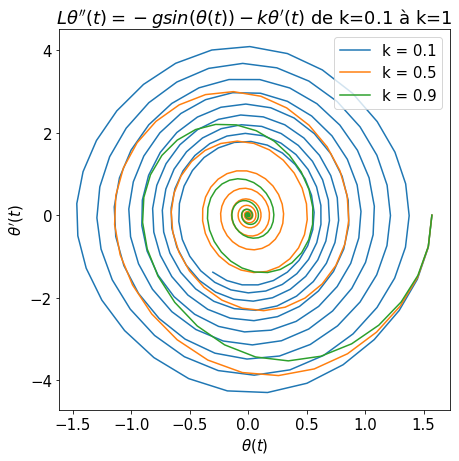

In [277]:
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(7, 7))
for k in np.arange(0.1, 1, step):
    res = Resolve(1, 0, 20, 250, k, "pendule")
    t, Y = res.kutta4()
    plt.plot(Y[:, 0], Y[:, 1], label=f"k = {k}")

plt.ylabel("$\\theta^\prime(t)$")
plt.xlabel("$\\theta(t)$")
plt.legend()
plt.title("$ \\it{L \\theta''(t) = -gsin(\\theta(t)) - k\\theta'(t)} $ de k=0.1 à k=1")
plt.show()

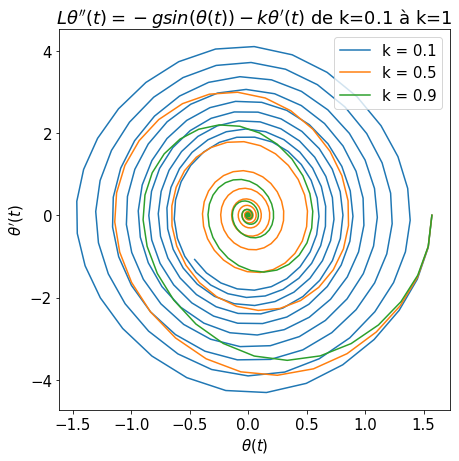

In [278]:
plt.figure(figsize=(7, 7))
for k in np.arange(0.1, 1, step):
    res = Resolve(1, 0, 20, 250, k, "pendule")
    t, Y = res.kutta2()
    plt.plot(Y[:, 0], Y[:, 1], label=f"k = {k}")

plt.ylabel("$\\theta^\prime(t)$")
plt.xlabel("$\\theta(t)$")
plt.legend()
plt.title("$ \\it{L \\theta''(t) = -gsin(\\theta(t)) - k\\theta'(t)} $ de k=0.1 à k=1")
plt.show()

### 2.2 Approximation des petites oscillations

#### 1) Comparaison deux solutions: explicite et numérique

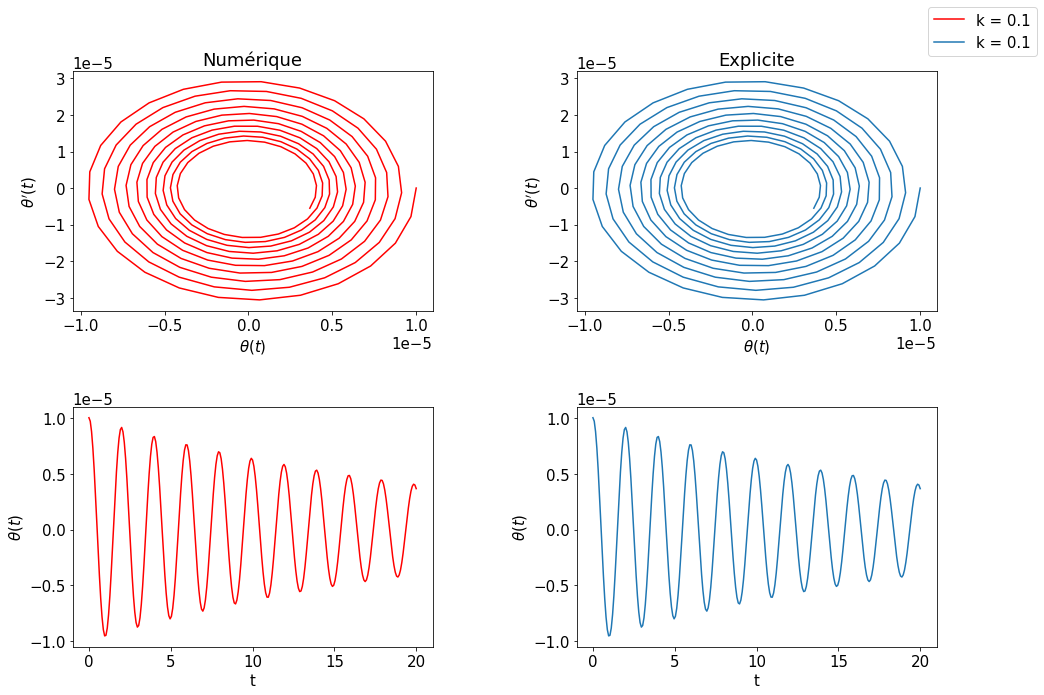

In [285]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(15)
fig.set_figheight(10)

res = Resolve(1, 0, 20, 250, 0.1, "pendule-2")
t, Y = res.kutta2()
axs[0, 0].plot(Y[:, 0], Y[:, 1], label="k = 0.1", color='red')
axs[1, 0].plot(t, Y[:, 0],  color='red')

res = Resolve(1, 0, 20, 250, 0.1, "pendule-linear")
t2, Y2 = res.kutta2()
axs[0, 1].plot(Y2[:, 0], Y2[:, 1], label="k = 0.1")
axs[1, 1].plot(t2, Y2[:, 0])

axs[0, 0].set(xlabel="$\\theta(t)$", ylabel="$\\theta^\prime(t)$", title="Numérique")
axs[0, 1].set(xlabel="$\\theta(t)$", ylabel="$\\theta^\prime(t)$", title="Explicite")

axs[1, 0].set(xlabel="t", ylabel="$\\theta(t)$")
axs[1, 1].set(xlabel="t", ylabel="$\\theta(t)$")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.legend()

plt.show()

Le résultat obtenue est le même en prenant k = 0.1.
On peut en conclure le résultat suivant:
Pour de très petites variations de $\theta$ on a: $sin(\theta) \approx \theta$

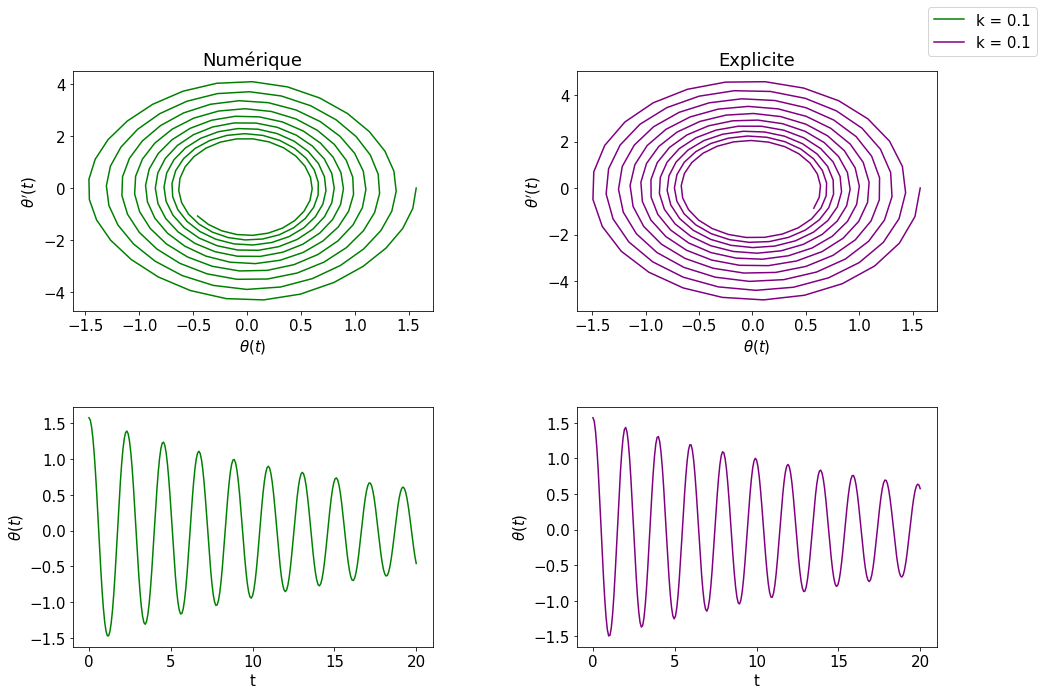

In [312]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(15)
fig.set_figheight(10)

res = Resolve(1, 0, 20, 250, 0.1, "pendule")
t, Y = res.kutta2()
axs[0, 0].plot(Y[:, 0], Y[:, 1], label="k = 0.1", color='green')
axs[1, 0].plot(t, Y[:, 0],  color='green')

res = Resolve(1, 0, 20, 250, 0.1, "pendule-linear2")
t2, Y2 = res.kutta2()
axs[0, 1].plot(Y2[:, 0], Y2[:, 1], label="k = 0.1", color='purple')
axs[1, 1].plot(t2, Y2[:, 0], color='purple')

axs[0, 0].set(xlabel="$\\theta(t)$", ylabel="$\\theta^\prime(t)$", title="Numérique")
axs[0, 1].set(xlabel="$\\theta(t)$", ylabel="$\\theta^\prime(t)$", title="Explicite")

axs[1, 0].set(xlabel="t", ylabel="$\\theta(t)$")
axs[1, 1].set(xlabel="t", ylabel="$\\theta(t)$")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.legend()

plt.show()

[(0.0, 20.0),

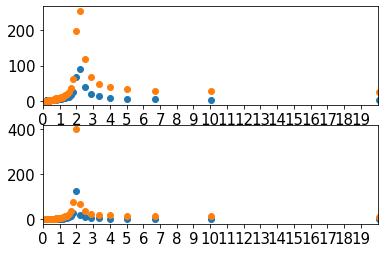

In [313]:
# Periode numerique
from scipy import fftpack
import warnings
warnings.filterwarnings('ignore')

# Periode des solutions d'Y l'equation pendule
ft_y = fftpack.fft(Y, axis=0)
frequencies = fftpack.fftfreq(Y.shape[0], t[1] - t[0])
periods = 1 / frequencies

# Periode des solutions d'Y2 l'equation pendule linearise
ft_y2 = fftpack.fft(Y2, axis=0)
frequencies2 = fftpack.fftfreq(Y2.shape[0], t2[1] - t2[0])
periods2 = 1 / frequencies2


fig, axs = plt.subplots(2)

axs[0].plot(periods, abs(ft_y), 'o')
axs[1].plot(periods, abs(ft_y2), 'o')

x = np.arange(0, 20, 1)
axs[0].set(xlim=(0, 20), xticks=x)
axs[1].set(xlim=(0, 20), xticks=x)

La période du signal semble être presque similaire (environs 2 sec)

#### 3) Utilisation de la formule de la période pour les calculs suivants.

(a)

In [322]:
import scipy.integrate as integrate

def f(x, k):
    return 1/(np.sqrt(1 - (k**2)*np.power(np.sin(x), 2)))

L = 1
theta = 0.001
k = np.sin(theta)/2
T0 = 4*np.sqrt(L/9.81)*integrate.quad(f, 0, np.pi/2, args=k)[0]

print("Periode T0 = ", T0, "s")

Periode T0 =  2.0060668060897906 s


La période obtenue avec l'intégration de scipy et la formule donnée correspond bien au résultat trouvé en 2)